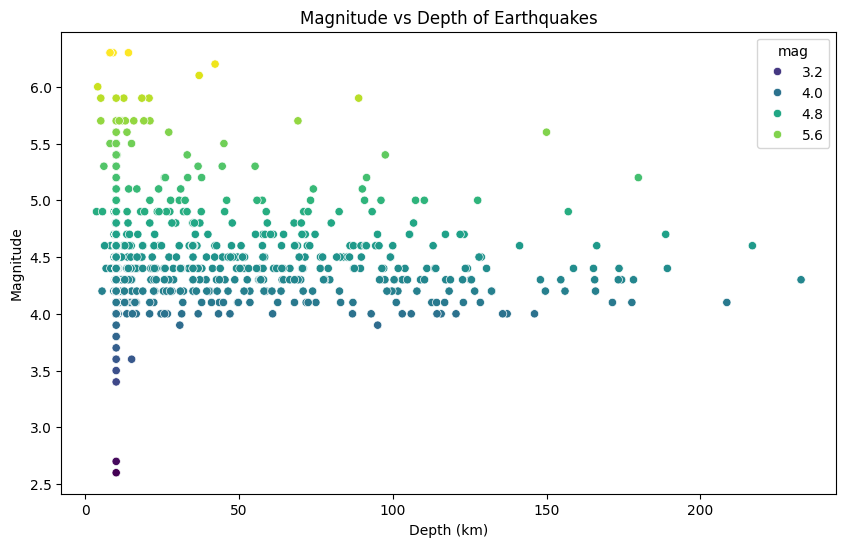

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 15.7639 - mae: 3.8614 - val_loss: 1.8335 - val_mae: 1.1210
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6346 - mae: 1.0415 - val_loss: 0.6788 - val_mae: 0.6226
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6528 - mae: 0.6340 - val_loss: 0.4803 - val_mae: 0.5363
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5090 - mae: 0.5443 - val_loss: 0.4259 - val_mae: 0.5010
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4591 - mae: 0.5171 - val_loss: 0.3636 - val_mae: 0.4671
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3852 - mae: 0.4755 - val_loss: 0.3162 - val_mae: 0.4369
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3347 - mae: 0.4413 - val_loss: 0.2829 - val_mae: 0.4090
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3099 - mae: 0.4216 - val_loss: 0.2420 - val_mae: 0.3821
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2962 - mae: 0.4074 - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 18.2141 - mae: 4.2271 - val_loss: 2.5234 - val_mae: 1.4392
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7475 - mae: 1.0747 - val_loss: 0.5180 - val_mae: 0.5392
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5168 - mae: 0.5561 - val_loss: 0.3223 - val_mae: 0.4299
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3352 - mae: 0.4425 - val_loss: 0.2340 - val_mae: 0.3729
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2685 - mae: 0.3882 - val_loss: 0.1878 - val_mae: 0.3287
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2483 - mae: 0.3702 - val_loss: 0.1751 - val_mae: 0.3272
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2268 - mae: 0.3497 - val_loss: 0.1564 - val_mae: 0.2954
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1817 - mae: 0.3193 - val_loss: 0.1447 - val_mae: 0.2917
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1776 - mae: 0.3076 - 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, LSTM, Flatten
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/Earthquakes.csv' #kaggle dataset (https://www.kaggle.com/datasets/ankitd7752/indian-subcontinent-earthquake-data-2000-to-2024)
earthquakes = pd.read_csv(file_path) #loading data
earthquakes = earthquakes.dropna() #dropping null values

#heatmap of the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='mag', hue='mag', palette='viridis', data=earthquakes)
plt.title('Magnitude vs Depth of Earthquakes')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

# Training
X = earthquakes[['depth', 'latitude', 'longitude']]  # Example features, adjust as necessary
y = earthquakes['mag']  # Target variable
scaler = StandardScaler() #feature scaling
X_scaled = scaler.fit_transform(X)

X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1) #reshaping data for CNN
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) #splitting the data

def CNN(X_train, X_test, y_train, y_test):
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1), padding='same')) #1D CNN
  model.add(MaxPooling1D(pool_size=1)) #maxpooling layer
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1))  # Output layer for regression
  model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae']) #compiling the model
  history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test)) #model training
  cnn_test_loss, cnn_test_mae = model.evaluate(X_test, y_test)
  return cnn_test_loss, cnn_test_mae

def CNN_LSTM(X_train, X_test, y_train, y_test):
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1), padding='same')) #1D CNN
  model.add(MaxPooling1D(pool_size=1)) #maxpooling layer
  #model.add(Flatten()) #flatten the output
  model.add(LSTM(50, return_sequences=False)) #LSTM layer
  model.add(Dense(128, activation='relu')) #fully connected layers
  model.add(Dense(1))  # Output layer for regression
  model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae']) #compile output
  history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test)) #train model
  cnn_lstm_test_loss, cnn_lstm_test_mae = model.evaluate(X_test, y_test)
  return cnn_lstm_test_loss, cnn_lstm_test_mae

cnn_test_loss, cnn_test_mae= CNN(X_train, X_test, y_train, y_test)
cnn_lstm_test_loss, cnn_lstm_test_mae= CNN_LSTM(X_train, X_test, y_train, y_test)
print(f'CNN model Test Loss: {cnn_test_loss}')
print(f'CNN Test MAE: {cnn_test_mae}')
print(f'CNN-LSTM model Test Loss: {cnn_lstm_test_loss}')
print(f'CNN-LSTM Test MAE: {cnn_lstm_test_mae}')